In [1]:
import pandas as pd
import pickle

In [2]:
combined_df = pd.read_pickle('./dylan/corpus_combined.pkl')
hits_df = pd.read_pickle('./dylan/hits.pkl')

data = pd.read_pickle('./dylan/dtm.pkl')

In [3]:
from gensim import matutils, models
import gensim
import gensim.corpora as corpora


import scipy.sparse
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
tdm = data.transpose()
tdm.head()

song,The Ballad of Frankie Lee and Judas Priest,As I Went Out One Morning,All Along the Watchtower,I Dreamed I Saw St. Augustine,The Wicked Messenger,I'll Be Your Baby Tonight,Drifter's Escape,I Pity the Poor Immigrant,Down Along the Cove,I Am A Lonesome Hobo,...,Meet Me in the Morning,Tangled Up in Blue,Call Letter Blues,Shelter from the Storm,You're a Big Girl Now,Simple Twist of Fate,You're Gonna Make Me Lonesome When You Go,Idiot Wind,Buckets of Rain,"If You See Her, Say Hello"
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
abe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abidin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [6]:
cv = pickle.load(open("./dylan/cv.pkl", "rb"))
id2word = dict((v ,k) for k, v in cv.vocabulary_.items())

In [7]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=6, passes=10)
lda.print_topics()

[(0,
  '0.015*"love" + 0.013*"just" + 0.010*"hard" + 0.009*"like" + 0.007*"little" + 0.006*"woman" + 0.006*"man" + 0.006*"oh" + 0.006*"new" + 0.006*"morning"'),
 (1,
  '0.019*"im" + 0.014*"like" + 0.012*"dont" + 0.010*"said" + 0.010*"know" + 0.010*"just" + 0.009*"youre" + 0.008*"time" + 0.008*"got" + 0.007*"say"'),
 (2,
  '0.009*"come" + 0.008*"father" + 0.008*"like" + 0.008*"im" + 0.007*"man" + 0.007*"oh" + 0.006*"night" + 0.006*"jane" + 0.006*"wont" + 0.005*"hand"'),
 (3,
  '0.011*"dont" + 0.011*"just" + 0.010*"said" + 0.006*"know" + 0.006*"got" + 0.006*"did" + 0.006*"ill" + 0.005*"youre" + 0.005*"theres" + 0.005*"im"'),
 (4,
  '0.013*"aint" + 0.010*"gonna" + 0.009*"work" + 0.007*"like" + 0.007*"just" + 0.007*"got" + 0.007*"door" + 0.007*"maggies" + 0.006*"knock" + 0.005*"town"'),
 (5,
  '0.010*"oh" + 0.010*"just" + 0.009*"like" + 0.009*"know" + 0.006*"got" + 0.006*"joey" + 0.006*"come" + 0.006*"hes" + 0.006*"dont" + 0.006*"sara"')]

In [8]:
# Nouns Only

from nltk import word_tokenize, pos_tag

In [9]:
def nouns(text):
    # Pull out the nouns
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [ word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [10]:
data_nouns = pd.DataFrame(combined_df.lyrics.apply(nouns))
data_nouns.head()

,lyrics
0,festival boys plannin fall cabaret drillin wal...
1,shots barroom night enter valentine hall barte...
2,darkness break noon shadows silver handmade ch...
3,theyre selling postcards theyre passports beau...
4,i mayflower i land i mayflower i land i captai...


In [11]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
stop_words = text.ENGLISH_STOP_WORDS

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.lyrics)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abe,abel,abidin,abound,accident,accordion,ace,aces,achilles,aching,...,yes,yesterday,yonder,york,youd,youll,youre,youth,youve,zanzinger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,2,4,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
corpus = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [14]:
ldan = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2wordn ,passes=10)
ldan.print_topics()

[(0,
  '0.013*"way" + 0.012*"father" + 0.012*"youre" + 0.011*"im" + 0.009*"stone" + 0.008*"morning" + 0.008*"night" + 0.007*"highway" + 0.007*"time" + 0.006*"man"'),
 (1,
  '0.012*"man" + 0.010*"youre" + 0.009*"time" + 0.009*"gon" + 0.007*"way" + 0.007*"eyes" + 0.007*"day" + 0.007*"jack" + 0.007*"door" + 0.006*"mind"'),
 (2,
  '0.014*"gon" + 0.014*"time" + 0.012*"aint" + 0.008*"love" + 0.008*"joey" + 0.008*"im" + 0.007*"knock" + 0.007*"woman" + 0.007*"youre" + 0.007*"friends"'),
 (3,
  '0.013*"hand" + 0.009*"love" + 0.009*"night" + 0.007*"sara" + 0.007*"town" + 0.006*"man" + 0.006*"war" + 0.006*"time" + 0.006*"lord" + 0.006*"shes"'),
 (4,
  '0.013*"im" + 0.012*"man" + 0.011*"dont" + 0.009*"time" + 0.009*"night" + 0.009*"day" + 0.007*"youre" + 0.006*"shes" + 0.006*"hes" + 0.005*"times"')]

In [15]:
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [16]:
data_nouns_adj = pd.DataFrame(hits_df.lyrics.apply(nouns_adj))
data_nouns_adj.head()

,lyrics
song,
Blowin' in the Wind,many roads man man n many seas white dove sail...
A Hard Rain's A-Gonna Fall,blueeyed son young ive side twelve misty mount...
"Don't Think Twice, It's All Right",use babe iffn use babe itll rooster crows brea...
Oxford Town,oxford town oxford town evrybodys heads sun do...
The Times They Are A-Changin',gather round people waters bone time worth bet...


In [17]:
cvna = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvna = cvna.fit_transform(data_nouns_adj.lyrics)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna.head()

,abel,ablazin,able,abstract,ace,achangin,aching,acres,advance,advertising,...,yes,yesterday,york,youd,youll,young,younger,youre,youve,zanzinger
song,,,,,,,,,,,,,,,,,,,,,
Blowin' in the Wind,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
A Hard Rain's A-Gonna Fall,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
"Don't Think Twice, It's All Right",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oxford Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Times They Are A-Changin',0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
corpus_na = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [19]:
ldana = models.LdaModel(corpus=corpus_na, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.019*"man" + 0.015*"hard" + 0.012*"time" + 0.009*"gon" + 0.008*"maggies" + 0.008*"woman" + 0.007*"aint" + 0.006*"im" + 0.006*"song" + 0.006*"lady"'),
 (1,
  '0.012*"storm" + 0.012*"shelter" + 0.008*"chimes" + 0.008*"freedom" + 0.007*"come" + 0.007*"war" + 0.007*"white" + 0.007*"hes" + 0.006*"game" + 0.006*"pawn"'),
 (2,
  '0.015*"sara" + 0.013*"babe" + 0.012*"youre" + 0.010*"lady" + 0.009*"idiot" + 0.008*"im" + 0.008*"eyes" + 0.008*"town" + 0.007*"man" + 0.007*"dont"'),
 (3,
  '0.007*"blue" + 0.007*"gates" + 0.007*"eden" + 0.006*"im" + 0.006*"day" + 0.005*"sun" + 0.005*"older" + 0.005*"younger" + 0.004*"dont" + 0.004*"night"')]

In [20]:
def sent_to_words(sentences):
    for sent in sentences:
        yield(gensim.utils.simple_preprocess(str(sent), deacc=True))
        
data_words = list(sent_to_words(combined_df.lyrics))

print(data_words[:1])

[['the', 'festival', 'was', 'over', 'the', 'boys', 'were', 'all', 'plannin', 'for', 'fall', 'the', 'cabaret', 'was', 'quiet', 'except', 'for', 'the', 'drillin', 'in', 'the', 'wall', 'the', 'curfew', 'had', 'been', 'lifted', 'and', 'the', 'gamblin', 'wheel', 'shut', 'down', 'anyone', 'with', 'any', 'sense', 'had', 'already', 'left', 'town', 'he', 'was', 'standin', 'in', 'the', 'doorway', 'looking', 'like', 'the', 'jack', 'of', 'hearts', 'he', 'moved', 'across', 'the', 'mirrored', 'room', 'set', 'it', 'up', 'for', 'everyone', 'he', 'said', 'then', 'everyone', 'commenced', 'to', 'do', 'what', 'they', 'were', 'doin', 'before', 'he', 'turned', 'their', 'heads', 'then', 'he', 'walked', 'up', 'to', 'stranger', 'and', 'he', 'asked', 'him', 'with', 'grin', 'could', 'you', 'kindly', 'tell', 'me', 'friend', 'what', 'time', 'the', 'show', 'begins', 'then', 'he', 'moved', 'into', 'the', 'corner', 'face', 'down', 'like', 'the', 'jack', 'of', 'hearts', 'backstage', 'the', 'girls', 'were', 'playin', '

In [21]:
# Build BiGrams and TriGrams
bigram = models.Phrases(data_words, min_count = 5, threshold=100)
trigram = models.Phrases(bigram[data_words], threshold=100)

bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[0]]])

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['the', 'festival', 'was', 'over', 'the', 'boys', 'were', 'all', 'plannin', 'for', 'fall', 'the', 'cabaret', 'was', 'quiet', 'except', 'for', 'the', 'drillin', 'in', 'the', 'wall', 'the', 'curfew', 'had', 'been', 'lifted', 'and', 'the', 'gamblin', 'wheel', 'shut', 'down', 'anyone', 'with', 'any', 'sense', 'had', 'already', 'left', 'town', 'he', 'was', 'standin', 'in', 'the', 'doorway', 'looking', 'like', 'the', 'jack', 'of', 'hearts', 'he', 'moved', 'across', 'the', 'mirrored', 'room', 'set', 'it', 'up', 'for', 'everyone', 'he', 'said', 'then', 'everyone', 'commenced', 'to', 'do', 'what', 'they', 'were', 'doin', 'before', 'he', 'turned', 'their', 'heads', 'then', 'he', 'walked', 'up', 'to', 'stranger', 'and', 'he', 'asked', 'him', 'with', 'grin', 'could', 'you', 'kindly', 'tell', 'me', 'friend', 'what', 'time', 'the', 'show', 'begins', 'then', 'he', 'moved', 'into', 'the', 'corner', 'face', 'down', 'like', 'the', 'jack', 'of', 'hearts', 'backstage', 'the', 'girls', 'were', 'playin', 'f

In [22]:
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[1:2])

[['pistol', 'shot', 'ring', 'barroom', 'night', 'enter', 'patty', 'valentine', 'upper', 'hall', 'see', 'bartender', 'pool', 'blood', 'cry', 'kill', 'come', 'story', 'hurricane', 'man', 'authority', 'come', 'blame', 'something', 'prison', 'cell', 'time', 'coulda', 'champion', 'world', 'body', 'lyin', 'do', 'patty', 'man', 'name', 'bello', 'movin', 'mysteriously', 'do', 'not', 'say', 'throw', 'hand', 'robbin', 'register', 'hope', 'understand', 'see', 'leavin', 'say', 'stop', 'good', 'cop', 'patty', 'call', 'cop', 'arrive', 'scene', 'red', 'light', 'flashin', 'hot', 'new', 'jersey', 'night', 'far', 'away', 'town', 'rubin', 'carter', 'couple', 'friend', 'drivin', 'number', 'contender', 'middleweight', 'crown', 'idea', 'kinda', 'shit', 'cop', 'pull', 'road', 'just', 'time', 'time', 'paterson', 'that', 's', 'just', 'way', 'thing', 'be', 'black', 'street', 'wanna', 'draw', 'heat', 'alfr', 'bello', 'partner', 'rap', 'cop', 'arthur', 'dexter', 'bradley', 'just', 'prowlin', 'say', 'see', 'man', 

In [24]:
id2wordlemma = corpora.Dictionary(data_lemmatized)

texts = data_lemmatized

corpus = [id2wordlemma.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 4), (12, 2), (13, 1), (14, 6), (15, 1), (16, 1), (17, 1), (18, 2), (19, 3), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 3), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 5), (63, 4), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 4), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 2), (107, 1), (108, 1), (109, 1), (110, 3)

In [25]:
id2wordlemma[0]

'actor'

In [26]:
[[(id2wordlemma[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('actor', 2),
  ('affair', 1),
  ('air', 1),
  ('alive', 1),
  ('arm', 1),
  ('ask', 1),
  ('attention', 1),
  ('away', 1),
  ('backstage', 2),
  ('bad', 1),
  ('bank', 1),
  ('be', 4),
  ('begin', 2),
  ('bet', 1),
  ('big', 6),
  ('black', 1),
  ('blink', 1),
  ('blowin', 1),
  ('bodyguard', 2),
  ('bout', 3),
  ('boy', 2),
  ('brandnew', 1),
  ('break', 1),
  ('breeze', 1),
  ('burst', 1),
  ('bury', 1),
  ('business', 1),
  ('butterfly', 1),
  ('cabaret', 2),
  ('call', 1),
  ('cane', 2),
  ('careful', 1),
  ('carriage', 1),
  ('certain', 1),
  ('chair', 1),
  ('child', 1),
  ('circumstance', 1),
  ('clean', 1),
  ('click', 1),
  ('closed', 1),
  ('coat', 1),
  ('cold', 1),
  ('combed', 1),
  ('come', 3),
  ('comin', 1),
  ('commence', 1),
  ('corner', 1),
  ('costume', 1),
  ('cover', 1),
  ('crowd', 1),
  ('crown', 1),
  ('curfew', 1),
  ('dandy', 1),
  ('darkness', 2),
  ('darlin', 1),
  ('day', 2),
  ('dearly', 1),
  ('deed', 1),
  ('diamond', 1),
  ('die', 1),
  ('dim', 1),


In [60]:
lda_model = models.LdaModel(corpus=corpus,
                           id2word = id2wordlemma,
                           num_topics = 50,
                           random_state = 100,
                           update_every = 1,
                           chunksize = 100,
                           passes = 10,
                           alpha = 'auto',
                           per_word_topics = True)

In [62]:
for r in lda_model.print_topics():
    print(r)
    print('\n')

(42, '0.000*"be" + 0.000*"do" + 0.000*"not" + 0.000*"get" + 0.000*"s" + 0.000*"feel" + 0.000*"guess" + 0.000*"have" + 0.000*"would" + 0.000*"use"')


(24, '0.000*"say" + 0.000*"jack" + 0.000*"be" + 0.000*"heart" + 0.000*"just" + 0.000*"not" + 0.000*"do" + 0.000*"go" + 0.000*"s" + 0.000*"look"')


(0, '0.000*"say" + 0.000*"hard" + 0.000*"ill" + 0.000*"man" + 0.000*"shelter" + 0.000*"come" + 0.000*"storm" + 0.000*"have" + 0.000*"hear" + 0.000*"do"')


(30, '0.000*"time" + 0.000*"know" + 0.000*"not" + 0.000*"say" + 0.000*"be" + 0.000*"blow" + 0.000*"do" + 0.000*"just" + 0.000*"jack" + 0.000*"love"')


(41, '0.052*"flora" + 0.040*"west" + 0.039*"lily" + 0.023*"lovely" + 0.012*"pleasure" + 0.012*"sore" + 0.012*"deprive" + 0.012*"betray" + 0.012*"pierce" + 0.011*"rest"')


(27, '0.015*"thief" + 0.008*"prince" + 0.008*"kindly" + 0.008*"falsely" + 0.008*"watchtower" + 0.008*"rider" + 0.008*"joker" + 0.008*"approach" + 0.008*"growl" + 0.008*"relief"')


(39, '0.023*"ridin" + 0.015*"sport" + 0.0

In [63]:
doc_lda = lda_model[corpus]

In [64]:
print('\nperplexity', lda_model.log_perplexity(corpus))

coherence_model_lda = models.CoherenceModel(model = lda_model, texts = data_lemmatized, dictionary=id2wordlemma, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score', coherence_lda)


perplexity -7.486345370616608

Coherence Score 0.3755090277956023


In [65]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2wordlemma)

vis

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
14     21.188898        1       1 -0.307818  0.022811
29     10.654557        1       2 -0.259280 -0.117796
8      10.051779        1       3 -0.301023  0.082246
9       7.642570        1       4 -0.198955 -0.067208
11      5.971543        1       5 -0.299068  0.051287
21      3.965045        1       6 -0.129186  0.009810
3       2.649734        1       7 -0.055113 -0.136139
45      2.620941        1       8 -0.012702 -0.132565
33      2.409048        1       9 -0.172706  0.037264
2       2.260890        1      10 -0.060360 -0.083237
46      1.978580        1      11 -0.043157 -0.108078
49      1.713086        1      12 -0.112341  0.096387
16      1.651440        1      13 -0.086641  0.064275
17      1.633426        1      14 -0.071116  0.175014
31      1.473804        1      15 -0.022229 -0.024561
12      1.374640        1      16 -0.034464  0.059392
22      1.337023        1      17 -0.026037 -0.061558
48      1.331762        1      18 -0.039799 -0.097263
6       1.220507        1      19 -0.035501  0.007638
36      1.131571        1      20 -0.002737 -0.089748
23      1.120420        1      21  0.022953  0.085426
47      1.118010        1      22  0.002853  0.020464
32      1.104671        1      23  0.052487 -0.000946
35      0.983667        1      24 -0.072101 -0.015234
20      0.975700        1      25  0.035440 -0.037061
15      0.950941        1      26  0.005656  0.039277
34      0.875552        1      27  0.075058 -0.030388
1       0.719813        1      28  0.040884 -0.018237
28      0.700065        1      29  0.115476  0.044055
19      0.678739        1      30  0.067546 -0.000844
25      0.678703        1      31  0.076600  0.030747
5       0.666856        1      32  0.008474  0.104768
18      0.648196        1      33  0.118947  0.031508
38      0.624242        1      34  0.077087 -0.019660
43      0.592320        1      35  0.057212 -0.010572
37      0.572492        1      36  0.115870  0.016299
10      0.530908        1      37  0.061485  0.054366
26      0.409880        1      38  0.092722 -0.003822
40      0.387911        1      39  0.079737 -0.019063
41      0.356711        1      40  0.124285 -0.000053
7       0.350441        1      41  0.115183  0.002163
4       0.349095        1      42  0.127451  0.012579
27      0.136733        1      43  0.116471  0.003018
39      0.112660        1      44  0.116021  0.005509
44      0.033559        1      45  0.108683  0.003643
13      0.020967        1      46  0.107352  0.003492
30      0.010180        1      47  0.105089  0.002650
0       0.009958        1      48  0.105082  0.002631
24      0.009933        1      49  0.105123  0.002654
42      0.009824        1      50  0.105108  0.002658, topic_info=     Category        Freq      Term       Total  loglift  logprob
term                                                             
2686  Default  486.000000        be  486.000000  30.0000  30.0000
1835  Default  180.000000      come  180.000000  29.0000  29.0000
3697  Default  426.000000       not  426.000000  28.0000  28.0000
334   Default  270.000000       say  270.000000  27.0000  27.0000
1012  Default   76.000000      will   76.000000  26.0000  26.0000
2334  Default   88.000000       ill   88.000000  25.0000  25.0000
1179  Default  219.000000      just  219.000000  24.0000  24.0000
2984  Default  216.000000        go  216.000000  23.0000  23.0000
841   Default  155.000000      love  155.000000  22.0000  22.0000
3447  Default   95.000000      want   95.000000  21.0000  21.0000
638   Default  351.000000        do  351.000000  20.0000  20.0000
2558  Default  218.000000         s  218.000000  19.0000  19.0000
3098  Default   85.000000       let   85.000000  18.0000  18.0000
1926  Default  175.000000       get  175.000000  17.0000  17.0000
2987  Default  207.000000      know  207.000000  16.0000  16.0000
2506  Default   58.000000  

In [38]:
mallet_path = '../mallet-2.0.8/bin/mallet'

In [59]:
# Improve Coherence Score with Mallet Model
ldamallet = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2wordlemma)

In [61]:
for t in ldamallet.show_topics():
    print(t)
    print('\n')

(20, '0.116*"life" + 0.101*"face" + 0.092*"play" + 0.066*"guess" + 0.035*"touch" + 0.032*"meet" + 0.029*"pay" + 0.023*"slip" + 0.023*"tie" + 0.023*"clear"')


(9, '0.076*"hear" + 0.076*"white" + 0.073*"poor" + 0.065*"boy" + 0.042*"sound" + 0.042*"turn" + 0.042*"hand" + 0.037*"stop" + 0.028*"chain" + 0.025*"remain"')


(8, '0.230*"hand" + 0.056*"lord" + 0.048*"keepa" + 0.048*"plow_hold" + 0.044*"good" + 0.036*"land" + 0.036*"mary" + 0.032*"new_morn" + 0.024*"gold" + 0.024*"happy"')


(41, '0.384*"love" + 0.101*"fool" + 0.062*"dream" + 0.047*"country" + 0.025*"dear" + 0.014*"angry" + 0.014*"teach" + 0.011*"landlord" + 0.011*"tide" + 0.011*"glow"')


(11, '0.093*"road" + 0.054*"pick" + 0.050*"care" + 0.042*"voice" + 0.035*"cup" + 0.035*"breath" + 0.027*"coffee" + 0.019*"warn" + 0.019*"valley" + 0.015*"tremble"')


(30, '0.113*"thing" + 0.063*"place" + 0.056*"sun" + 0.056*"king" + 0.050*"house" + 0.047*"begin" + 0.027*"song" + 0.023*"new_orlean" + 0.020*"rise" + 0.020*"ruin"')


(0, '0.115

In [37]:
coherence_model_ldamallet = models.CoherenceModel(model = ldamallet, texts=data_lemmatized, dictionary=id2wordlemma, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print(coherence_ldamallet)

0.25575280754423135


In [40]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start,limit,step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2wordlemma)
        
        model_list.append(model)
        
        coherencemodel = models.CoherenceModel(model=model, texts = texts, dictionary=dictionary, coherence='c_v')
        
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [46]:
model_list, coherence_values = compute_coherence_values(dictionary=id2wordlemma, corpus=corpus, texts = data_lemmatized, limit=100, start = 10, step=10)


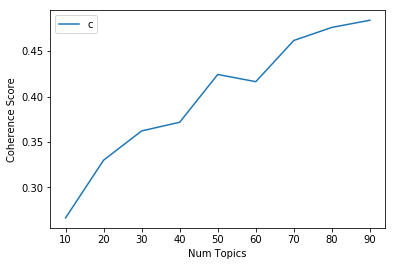

In [47]:
limit =100
start = 10
step = 10

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(("coherence_values"), loc='best')
plt.show()

In [55]:
optimal_model = model_list[8]
model_topics = optimal_model.show_topics()
for t in model_topics:
    print(t)
    print('\n')

(89, '0.278*"blow" + 0.071*"time" + 0.047*"idiot_wind" + 0.036*"strike" + 0.030*"tree" + 0.024*"idiot" + 0.024*"burn" + 0.024*"fact" + 0.024*"shoot" + 0.024*"surely"')


(44, '0.142*"bad" + 0.114*"guess" + 0.108*"work" + 0.068*"leave" + 0.062*"hit" + 0.040*"rest" + 0.028*"til" + 0.023*"tale" + 0.023*"smell" + 0.023*"lift"')


(86, '0.152*"play" + 0.137*"face" + 0.086*"watch" + 0.081*"break" + 0.081*"begin" + 0.041*"gypsy" + 0.030*"sound" + 0.025*"flash" + 0.025*"trail" + 0.020*"shout"')


(73, '0.174*"throw" + 0.099*"long" + 0.076*"roll" + 0.070*"winterlude" + 0.035*"coin_whos" + 0.035*"minstrel_boy" + 0.035*"mighty" + 0.029*"save" + 0.029*"heavy" + 0.023*"staying"')


(32, '0.139*"home" + 0.111*"lay" + 0.104*"poor" + 0.069*"spend" + 0.062*"johnny" + 0.062*"peggy" + 0.049*"travel" + 0.035*"bind" + 0.028*"immigrant" + 0.028*"lonesome"')


(19, '0.080*"hear" + 0.058*"turn" + 0.051*"sayin" + 0.044*"speak" + 0.044*"vision" + 0.044*"alley" + 0.036*"ghost" + 0.036*"spy" + 0.029*"johanna" + 0

In [58]:
coherence_values[8]

0.4839995494363568